<a href="https://colab.research.google.com/github/kliang696/Bank-Churn-Analysis/blob/main/bank_churn_analysis_ROS_1221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis and Data Cleaning

### Part 1 Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/BankChurnAnalysis/BankChurners.csv")

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### 1.1 What’s the shape of this dataset? How many features do we have in this dataset? Is there any null values?

In [5]:
df.shape

(10127, 23)

In [6]:
# Create a Boolean mask of null values
null_mask = df.isnull()

# Sum the mask to find the total number of null values
num_nulls = null_mask.sum()

print(num_nulls)

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In this dataset,it involves 23 features. we have 23 columns with 10127 rows and based on the talbe above, we don't have any null values.




#### 1.2 Is there any data that we need to remove in this dataset?

In [7]:
df = df.drop(df.columns[[-1, -2]],axis = 1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In this dataset, the last two columns are not needed, so we remove them to keep data organized and clean

#### 1.4 If this dataset is imbalanced?

In [8]:
target = df["Attrition_Flag"] # Target variable

In [9]:
target.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

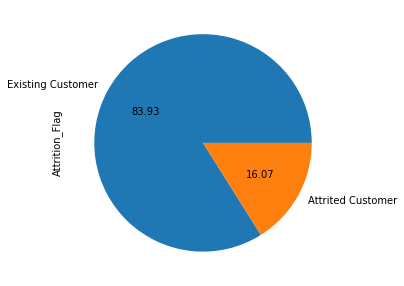

In [10]:
target.value_counts().plot.pie(autopct='%.2f',figsize=(6, 5))

*   As we can see, this dataset is not balanced at all where lable 0 make up the majority of the dataset and leaving lable 1 fewer examples. 

*   It will casue problems becasue a biased model will be built based on imbalanced data which is accurate to predict the majority class but fails to predict the minority class.

* This problem will be resolved using random over-sampling technique.





### Part 2 Data Exploration for categorical data
#### CountPlot for numerical data

#### 2.1 How many unique values are there, and what are the frequencies of these values? Shall we convert any of the categorical variables to numerical to get better results? 

In [11]:
df["Attrition_Flag"].replace(['Existing Customer', 'Attrited Customer'],[0, 1], inplace=True)
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [12]:
df["Gender"].replace(['F', 'M'],[0, 1], inplace=True)
df["Gender"].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [13]:
df['Education_Level'].replace(['Uneducated', 'High School','College','Graduate','Post-Graduate','Doctorate','Unknown'],[0, 1, 2, 3, 4,5,np.nan], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    3128
1.0    2013
NaN    1519
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [14]:
df['Education_Level'].replace([np.nan],[3], inplace=True)
df['Education_Level'].value_counts(dropna=False)

3.0    4647
1.0    2013
0.0    1487
2.0    1013
4.0     516
5.0     451
Name: Education_Level, dtype: int64

In [15]:
df["Income_Category"].replace(['Less than $40K', '$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'],[0, 1, 2, 3, 4,np.nan], inplace=True)
df['Income_Category'].value_counts(dropna=False)

0.0    3561
1.0    1790
3.0    1535
2.0    1402
NaN    1112
4.0     727
Name: Income_Category, dtype: int64

In [16]:
df["Income_Category"].replace([np.nan],[0], inplace=True)
df['Income_Category'].value_counts()

0.0    4673
1.0    1790
3.0    1535
2.0    1402
4.0     727
Name: Income_Category, dtype: int64

In [17]:
df["Card_Category"].replace(['Blue', 'Silver', 'Gold', 'Platinum'],[0, 1, 2, 3], inplace=True)
df["Card_Category"].value_counts()

0    9436
1     555
2     116
3      20
Name: Card_Category, dtype: int64

In this section, we convert all the categorical to numerical values.

In [18]:
df_cat = df[['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']]

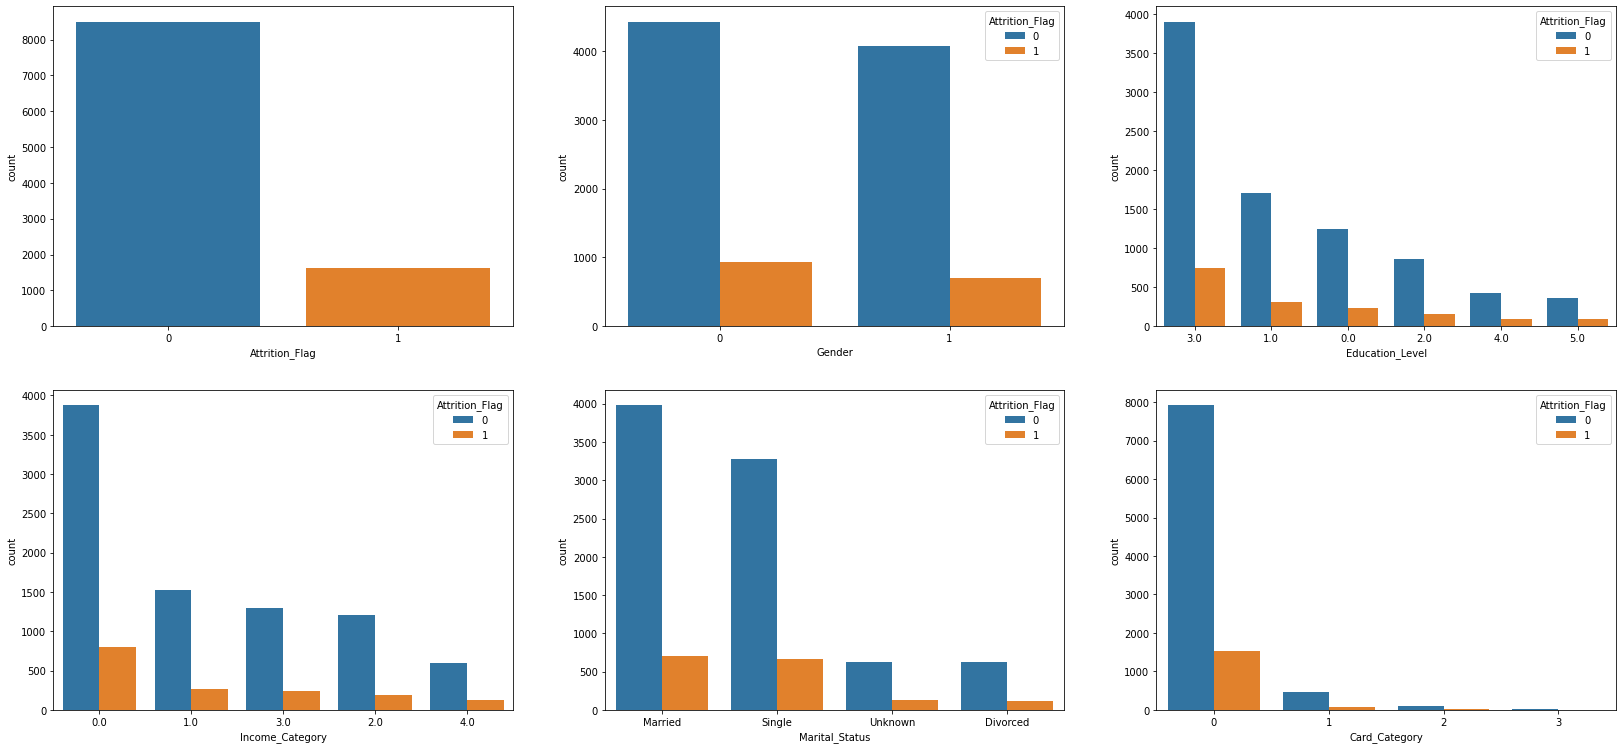

In [19]:
plt.figure(figsize=(28, 20))

plt.subplot(3,3,1)
sns.countplot(x=df["Attrition_Flag"],data=df)
plt.subplot(3,3,2)
sns.countplot(x=df["Gender"],hue="Attrition_Flag",order = df['Gender'].value_counts().index,data=df)
plt.subplot(3,3,3)
ax2 = sns.countplot(x=df["Education_Level"],hue="Attrition_Flag",order = df['Education_Level'].value_counts().index, data=df)
plt.subplot(3,3,4)
ax3 = sns.countplot(x=df["Income_Category"],hue="Attrition_Flag",order = df['Income_Category'].value_counts().index,data=df)
plt.subplot(3,3,5)
ax4 = sns.countplot(x=df["Marital_Status"],hue="Attrition_Flag",order = df['Marital_Status'].value_counts().index,data=df)
plt.subplot(3,3,6)
ax5 = sns.countplot(x=df["Card_Category"],hue="Attrition_Flag",order = df['Card_Category'].value_counts().index,data=df)




### Part 3 Data Exploration for numerical data
#### Plot histogram of numerical data

In [20]:
df_num = df[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

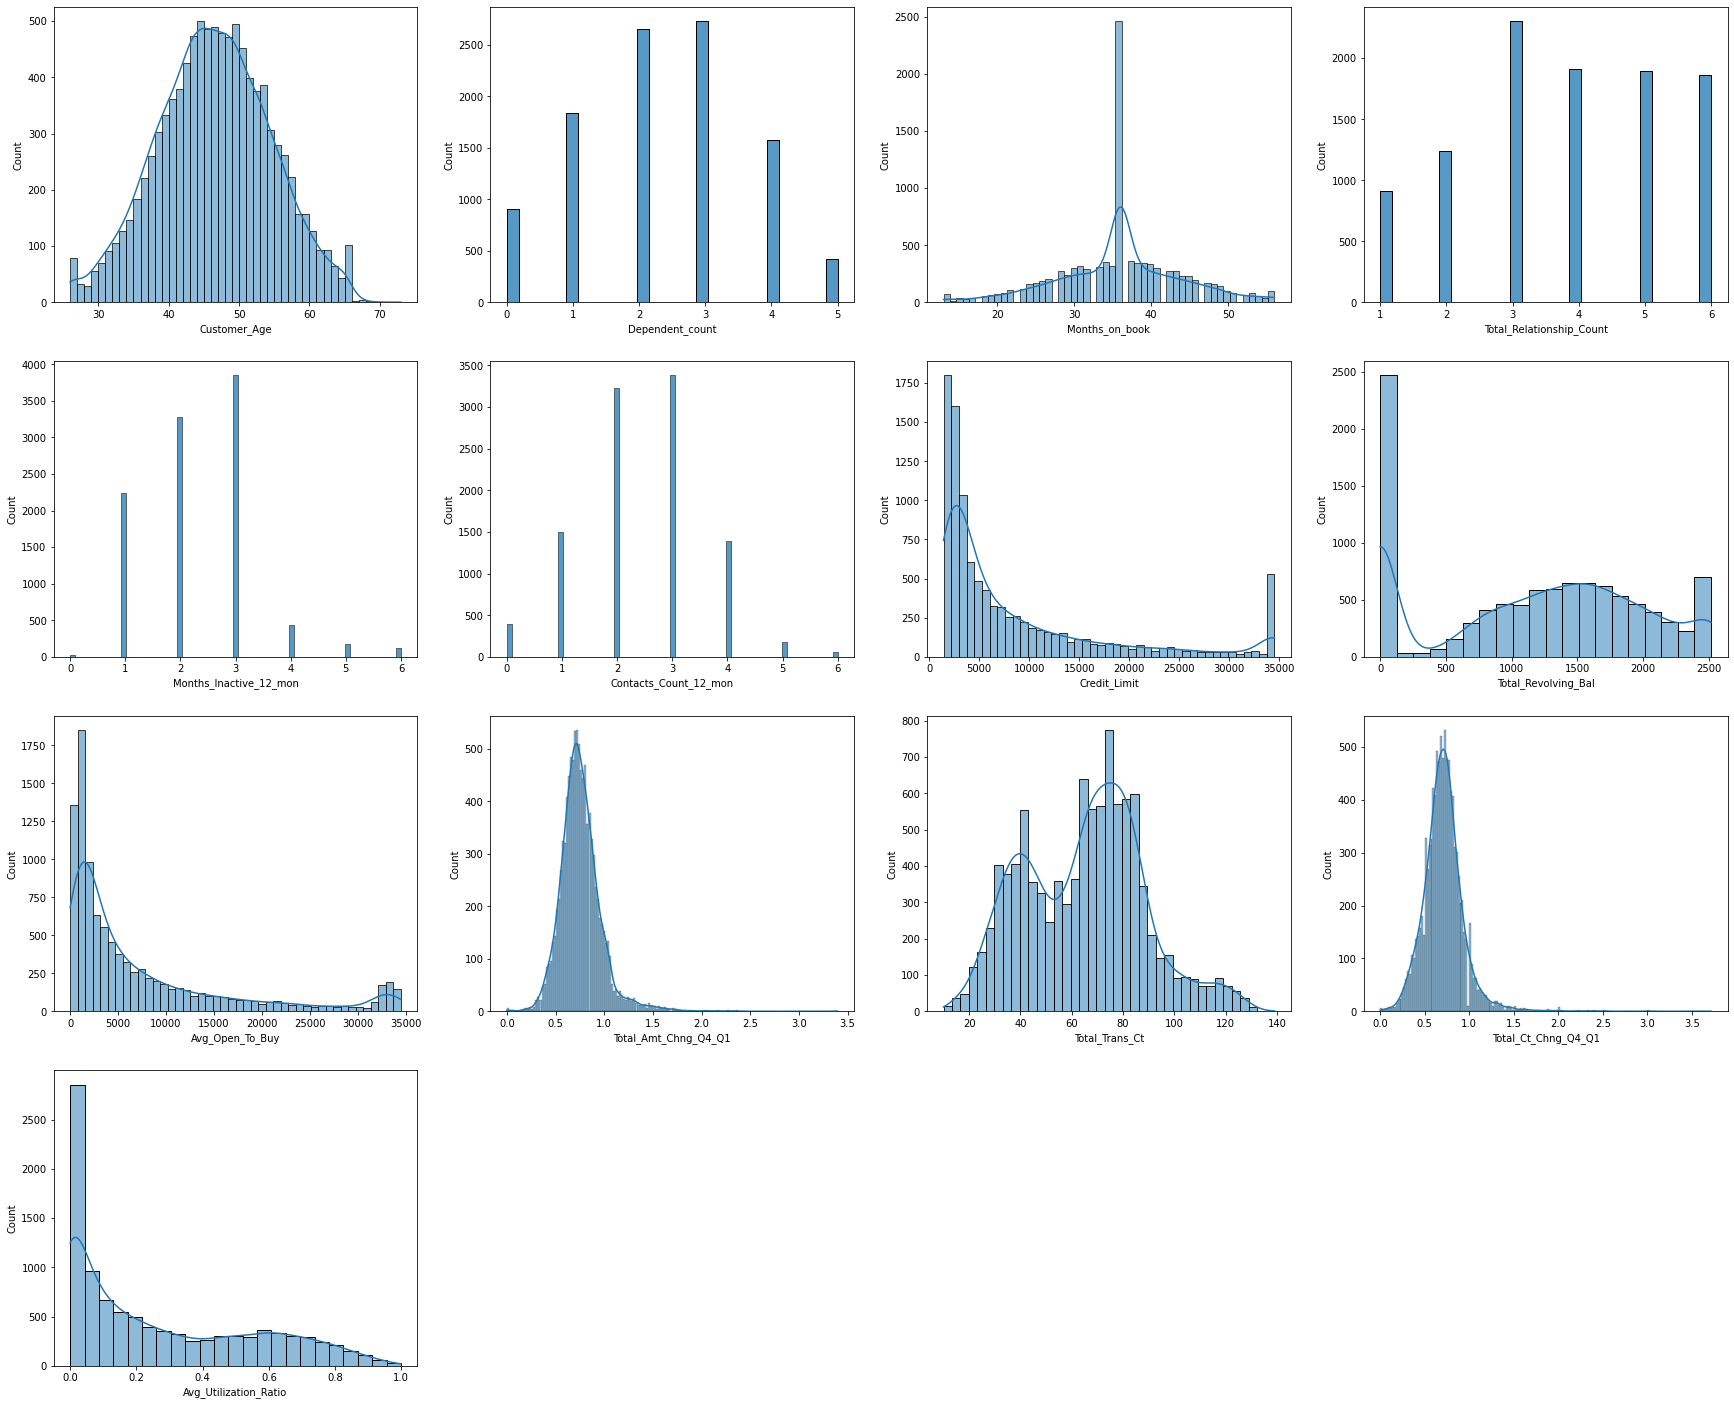

In [21]:
plt.figure(figsize=(30, 25))

plt.subplot(4,4,1)
sns.histplot(x=df_num["Customer_Age"],kde=True,data=df)
plt.subplot(4,4,2)
sns.histplot(x=df_num["Dependent_count"],kde=False,data=df)
plt.subplot(4,4,3)
sns.histplot(x=df_num["Months_on_book"],kde=True,data=df)
plt.subplot(4,4,4)
sns.histplot(x=df_num["Total_Relationship_Count"],kde=False,data=df)
plt.subplot(4,4,5)
sns.histplot(x=df_num["Months_Inactive_12_mon"],kde=False,data=df)
plt.subplot(4,4,6)
sns.histplot(x=df_num["Contacts_Count_12_mon"],kde=False,data=df)
plt.subplot(4,4,7)
sns.histplot(x=df_num["Credit_Limit"],kde=True,data=df)
plt.subplot(4,4,8)
sns.histplot(x=df_num["Total_Revolving_Bal"],kde=True,data=df)
plt.subplot(4,4,9)
sns.histplot(x=df_num["Avg_Open_To_Buy"],kde=True,data=df)
plt.subplot(4,4,10)
sns.histplot(x=df_num["Total_Amt_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,11)
sns.histplot(x=df_num["Total_Trans_Ct"],kde=True,data=df)
plt.subplot(4,4,12)
sns.histplot(x=df_num["Total_Ct_Chng_Q4_Q1"],kde=True,data=df)
plt.subplot(4,4,13)
sns.histplot(x=df_num["Avg_Utilization_Ratio"],kde=True,data=df)


#### 3.1 Is there any outliers in any of these features in this dataset?

From the histograms above, we do not notice any outliers.

#### 3.2 Are there any correlations or associations between the data and label?

In [22]:
df_num["Flag"]=df['Attrition_Flag']

In [23]:
df_num.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


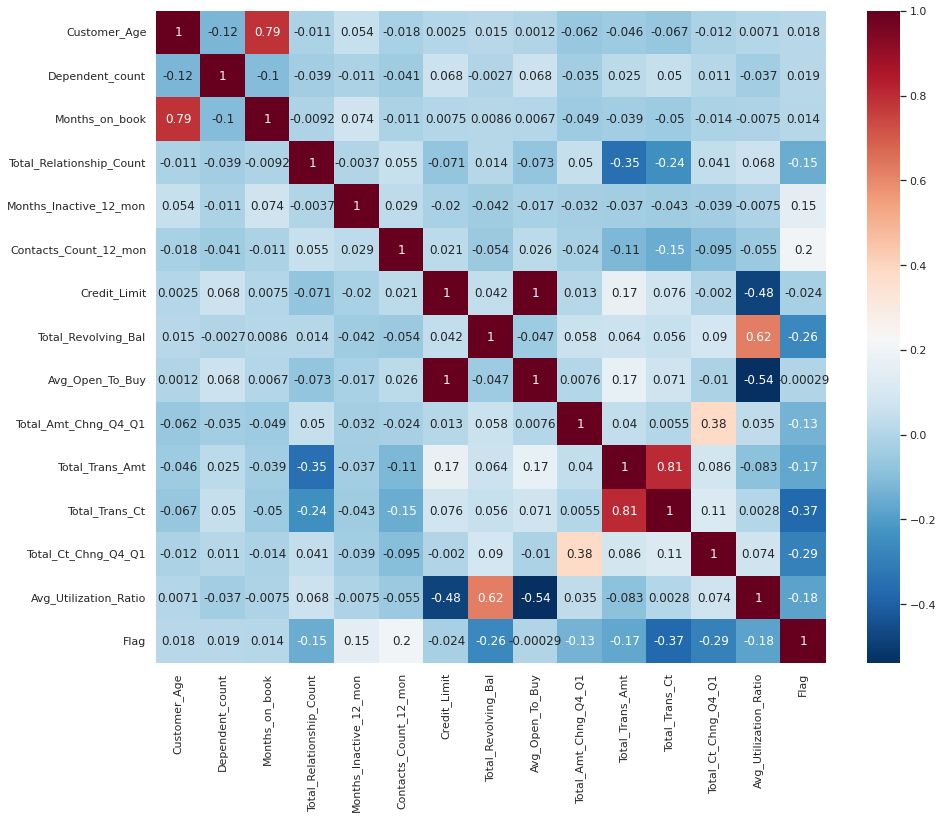

In [24]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df_num.corr(),annot=True,cmap='RdBu_r')

#### 3.3 What are the top 5 numerical features that most correlated on churn?

In [25]:
correlations = df.corr()

# Take the absolute value of the correlations
correlations = correlations.abs()

# Sort the correlations in descending order
correlations = correlations.sort_values(by="Attrition_Flag", ascending=False)

# Select the top 5 variables that are most correlated with the target
top_5 = correlations.head(6)

index_labels = top_5.index.tolist()

# Print the index labels of the top 5 variables
print("Top 5 correlated numericalvariables:")
for label in index_labels[1:]:
    print(label)



Top 5 correlated numericalvariables:
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Total_Revolving_Bal
Contacts_Count_12_mon
Avg_Utilization_Ratio


#Feature Enginearing

In [26]:
df["Recolving_Bal_Per_Relationship"]=df["Total_Revolving_Bal"]/df["Total_Relationship_Count"]

In [27]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship
0,768805383,0,45,1,3,1.0,Married,2.0,0,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,155.4
1,818770008,0,49,0,5,3.0,Single,0.0,0,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,144.0
2,713982108,0,51,1,3,3.0,Married,3.0,0,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0
3,769911858,0,40,0,4,1.0,Unknown,0.0,0,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,839.0
4,709106358,0,40,1,3,0.0,Married,2.0,0,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0


## One hot encoding

In [28]:
df1 = pd.get_dummies(df, columns=['Marital_Status'],drop_first=True,prefix='Is')
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
0,768805383,0,45,1,3,1.0,2.0,0,39,5,...,11914.0,1.335,1144,42,1.625,0.061,155.4,1,0,0
1,818770008,0,49,0,5,3.0,0.0,0,44,6,...,7392.0,1.541,1291,33,3.714,0.105,144.0,0,1,0
2,713982108,0,51,1,3,3.0,3.0,0,36,4,...,3418.0,2.594,1887,20,2.333,0.000,0.0,1,0,0
3,769911858,0,40,0,4,1.0,0.0,0,34,3,...,796.0,1.405,1171,20,2.333,0.760,839.0,0,0,1
4,709106358,0,40,1,3,0.0,2.0,0,21,5,...,4716.0,2.175,816,28,2.500,0.000,0.0,1,0,0


## What are the correlations after the feature engineering?

In [29]:
correlations_fe = df1.corr()

# Take the absolute value of the correlations
correlations_fe = correlations_fe.abs()

# Sort the correlations in descending order
correlations_fe = correlations_fe.sort_values(by="Attrition_Flag", ascending=False)

# Select the top 5 variables that are most correlated with the target
top_5 = correlations_fe.head(6)

index_labels = top_5.index.tolist()

# Print the index labels of the top 5 variables
print("Top 5 correlated numericalvariables:")
for label in index_labels[1:]:
    print(label)

Top 5 correlated numericalvariables:
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Total_Revolving_Bal
Contacts_Count_12_mon
Avg_Utilization_Ratio


# Model1: Logistic Regression 

## Import packages

In [30]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_validate
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import shap


In [32]:
X = df1.iloc[:,2:] # Features
y = df1["Attrition_Flag"] # Target variable

## split data without random sampling

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

## Random Over Sampling

In [34]:
from imblearn.over_sampling import SMOTE

ros = RandomOverSampler(sampling_strategy=1) 
X_res_os, y_res_os = ros.fit_resample(X_train, y_train)
y_res_os.value_counts()

0    6777
1    6777
Name: Attrition_Flag, dtype: int64

In [35]:
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=223)

## Build model

In [36]:
logreg = LogisticRegression(max_iter=1000,solver="liblinear")
logreg.fit(X_train_os, y_train_os)

LogisticRegression(max_iter=1000, solver='liblinear')

In [37]:
y_pred_logreg_test = logreg.predict(X_test)

y_pred_proba_logreg_test = logreg.predict_proba(X_test)[:, 1]


## Confusion Matrix

In [38]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg_test)
cnf_matrix

array([[1460,  263],
       [  59,  244]])

## Classification Report

In [39]:
print(classification_report(y_test, y_pred_logreg_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1723
           1       0.48      0.81      0.60       303

    accuracy                           0.84      2026
   macro avg       0.72      0.83      0.75      2026
weighted avg       0.89      0.84      0.86      2026



In [40]:
round(metrics.average_precision_score(y_test, y_pred_proba_logreg_test), 2)

0.7

In [41]:
round(metrics.roc_auc_score(y_test, y_pred_proba_logreg_test), 2)

0.9

## Precision Recall Curve and Average Precision Score

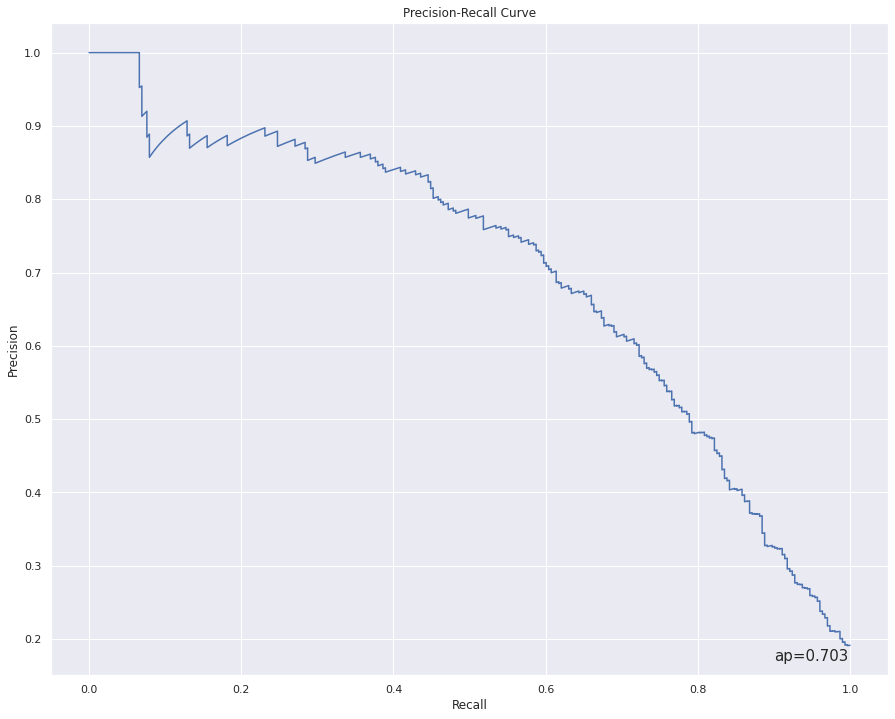

In [42]:
precision_logreg, recall_logreg, thresholds = precision_recall_curve(y_test, y_pred_proba_logreg_test)

ap_logreg=np.round(average_precision_score(y_test, y_pred_proba_logreg_test),3)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_logreg, precision_logreg)

ax.text(0.9, 0.17,'ap=' + str(ap_logreg) , fontsize=15) 

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve and roc_auc score

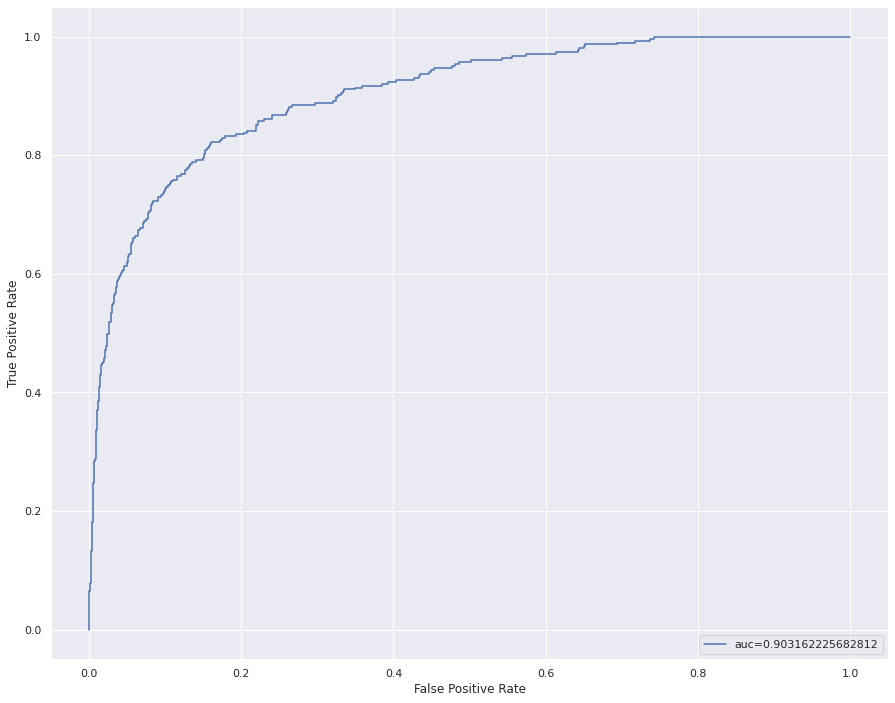

In [43]:
#define metrics

fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_pred_proba_logreg_test)
#create ROC curve
auc_logreg = metrics.roc_auc_score(y_test, y_pred_proba_logreg_test)
plt.plot(fpr_logreg,tpr_logreg,label="auc="+str(auc_logreg))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 5-Fold Cross Validation

In [44]:
def myplot(y_actual, y_score,mylabel):
  ap_train=np.round(average_precision_score(y_actual, y_score),3)

  precision, recall, thresholds = precision_recall_curve(y_actual, y_score)

  #create precision recall curve
  #fig, ax = plt.subplots()
  ax=sns.lineplot(recall, precision,label=mylabel)

  #ax.text(0.7, 0.2,'ap=' + str(ap_train) , fontsize=15) 
  #add axis labels to plot
  ax.set_title('Precision-Recall Curve')
  ax.set_ylabel('Precision')
  ax.set_xlabel('Recall')

  #display plot
  #plt.show()

In [45]:

def my_aucplot(y_actual, y_score,mylabel):
#define metrics
  roc_auc = metrics.roc_auc_score(y_test, y_score)
  
  fpr, tpr, _ = metrics.roc_curve(y_actual,  y_score)
#create ROC curve
  
  
  ax_roc=sns.lineplot(fpr,tpr,label=mylabel)

  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  


  
 

,ap_train,ap_test
0,0.9260,0.7050
1,0.9100,0.7490
2,0.9200,0.7510
3,0.9280,0.7330
4,0.9270,0.7050
Average,0.9222,0.7286


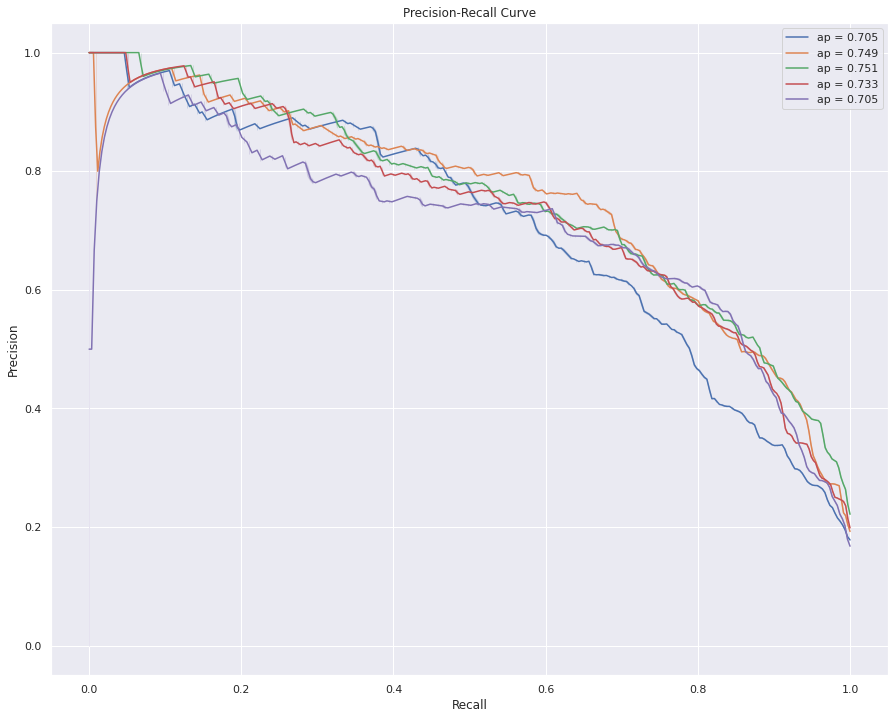

In [46]:
ap_train_list_logreg=[]
ap_test_list_logreg=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")

  logreg.fit(X_train_os, y_train_os)

  y_pred=logreg.predict(X_test)

  y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

  y_pred_proba_logreg_train = logreg.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train_os, y_pred_proba_logreg_train),3)
  ap_train_list_logreg.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_logreg),3)
  ap_test_list_logreg.append(ap_test)

  myplot(y_test, y_pred_proba_logreg,"ap = " +str(ap_test))

  
  

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_logreg,"ap_test":ap_test_list_logreg})

avg_list = [rfc_ap_df['ap_train'].mean(), rfc_ap_df['ap_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list


rfc_ap_df.head(7)

In [47]:
round(metrics.average_precision_score(y_test, y_pred_proba_logreg), 2)

0.7

In [48]:
round(metrics.roc_auc_score(y_test, y_pred_proba_logreg), 2)

0.92

,roc_train,roc_test
0,0.927,0.8980
1,0.922,0.9260
2,0.925,0.9270
3,0.931,0.9100
4,0.925,0.9210
Average,0.926,0.9164


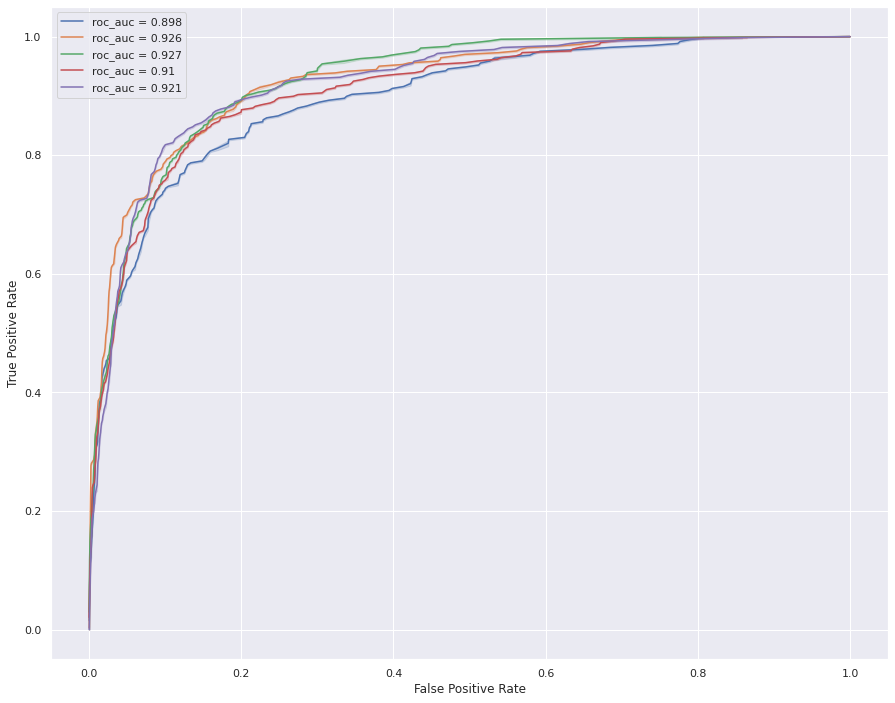

In [49]:
ap_train_list_logreg=[]
ap_test_list_logreg=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  logreg = LogisticRegression(max_iter=1000,solver="liblinear")

  logreg.fit(X_train_os, y_train_os)

  y_pred=logreg.predict(X_test)

  y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

  y_pred_proba_logreg_train = logreg.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_logreg_train),3)
  ap_train_list_logreg.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_logreg),3)
  ap_test_list_logreg.append(ap_test)

  my_aucplot(y_test, y_pred_proba_logreg,"roc_auc = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"roc_train":ap_train_list_logreg,"roc_test":ap_test_list_logreg})

avg_list = [rfc_ap_df['roc_train'].mean(), rfc_ap_df['roc_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(7)

## Feature Importance

In [50]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

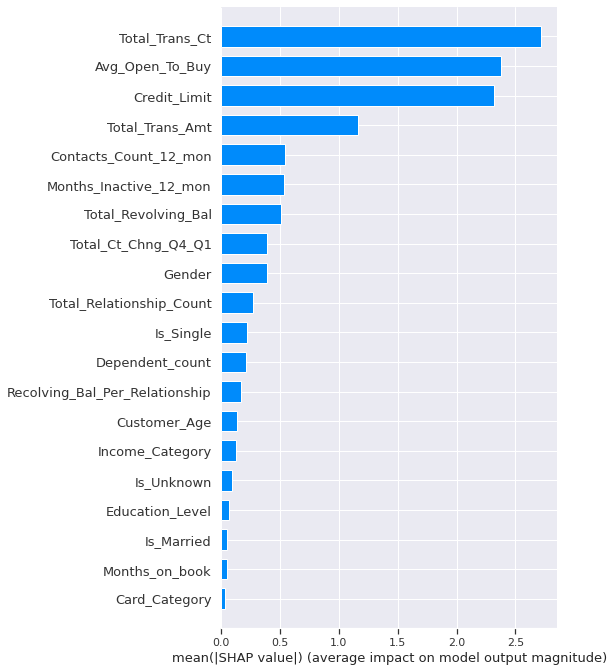

In [51]:
explainer_logreg = shap.LinearExplainer(logreg, X_train_os, feature_dependence="independent")
shap_values_logreg = explainer_logreg.shap_values(X_test)

shap.summary_plot(shap_values_logreg, X_test, plot_type="bar")

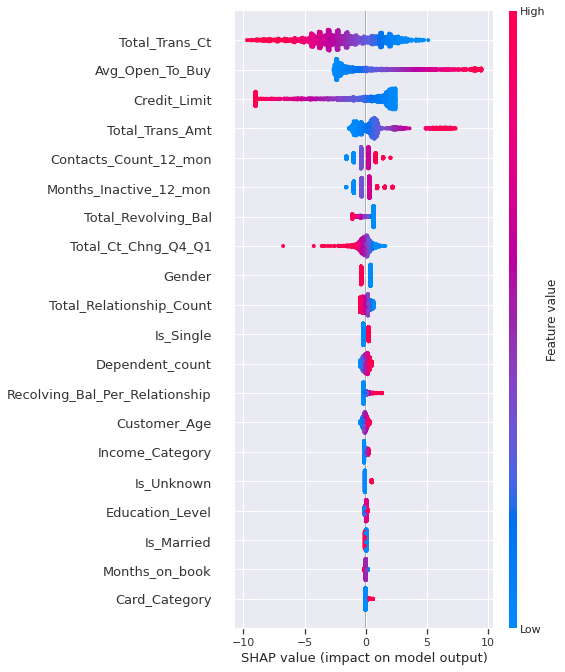

In [52]:
shap.summary_plot(shap_values_logreg, X_test)

# Model 2: Random Forest Classfier

## Build Model

In [53]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=6,criterion="entropy")

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train_os,y_train_os)

y_pred_rfc=rfc.predict(X_test)

y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]

## Confusion Matrix

In [54]:
rfc_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
rfc_matrix

array([[1608,  119],
       [  24,  275]])

## Classification Report

In [55]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1727
           1       0.70      0.92      0.79       299

    accuracy                           0.93      2026
   macro avg       0.84      0.93      0.88      2026
weighted avg       0.94      0.93      0.93      2026



In [56]:
round(metrics.average_precision_score(y_test, y_pred_proba_rfc), 2)

0.88

In [57]:
round(metrics.roc_auc_score(y_test, y_pred_proba_rfc), 2)

0.98

## Precision Recall Curve

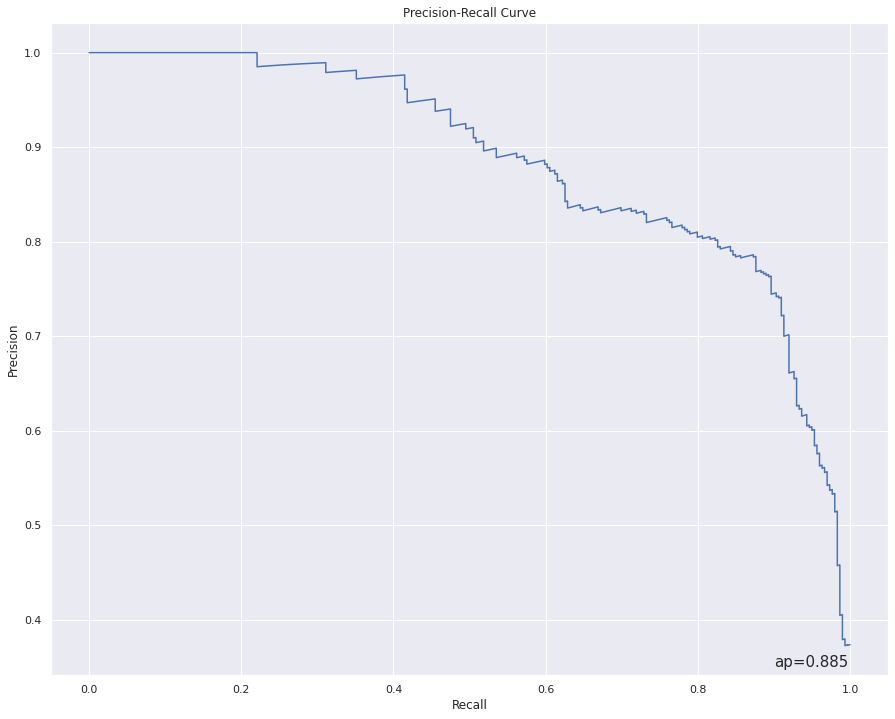

In [58]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall

ap_rfc=np.round(average_precision_score(y_test, y_pred_proba_rfc),3)

precision_rfc, recall_rfc, thresholds = precision_recall_curve(y_test, y_pred_proba_rfc)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_rfc, precision_rfc)
ax.text(0.9, 0.35,'ap=' + str(ap_rfc) , fontsize=15) 

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## ROC-AUC Curve

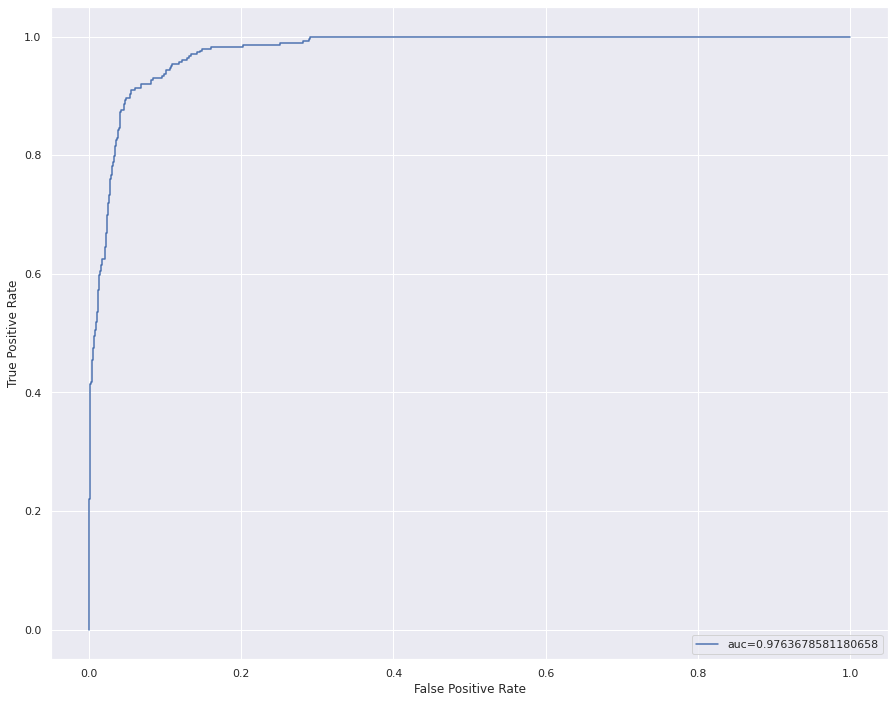

In [59]:
#define metrics

fpr_rfc, tpr_rfc, _ = metrics.roc_curve(y_test,  y_pred_proba_rfc)
#create ROC curve
auc_rfc = metrics.roc_auc_score(y_test, y_pred_proba_rfc)
plt.plot(fpr_rfc,tpr_rfc,label="auc="+str(auc_rfc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 5-Fold cross validation

,ap_train,ap_test
0,0.911,0.843
1,0.908,0.893
2,0.911,0.876
3,0.912,0.880
4,0.913,0.888
Average,0.911,0.876


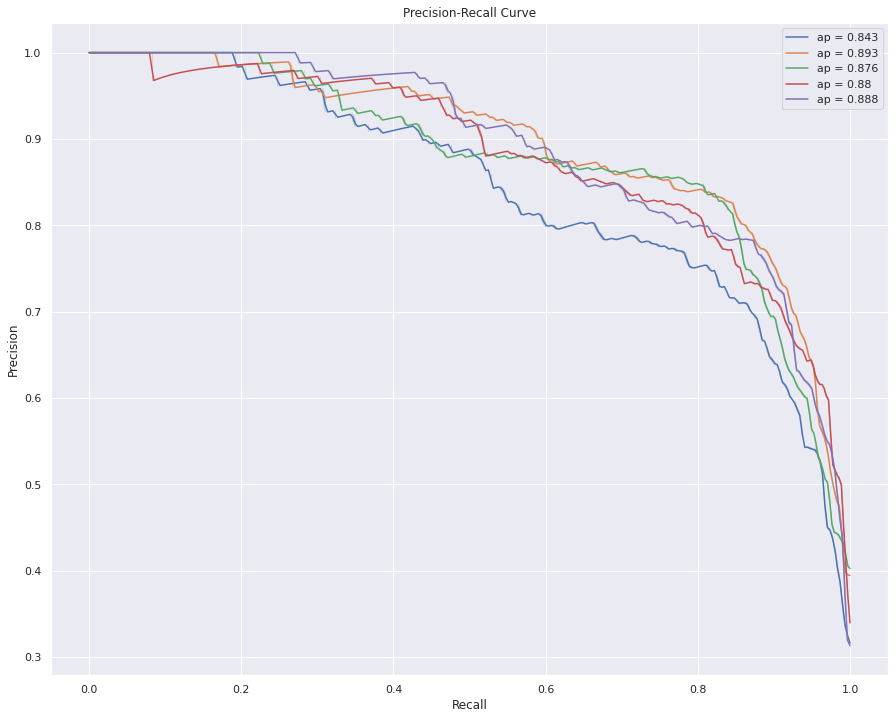

In [60]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  rfc=RandomForestClassifier(n_estimators=100,max_depth=6,criterion="entropy")

  rfc.fit(X_train_os,y_train_os)


  y_pred=rfc.predict(X_test)

  y_pred_proba_rfc_cv = rfc.predict_proba(X_test)[:, 1]

  y_pred_proba_rfc_train_cv = rfc.predict_proba(X_train)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train, y_pred_proba_rfc_train_cv),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_rfc_cv),3)
  ap_test_list_xgb.append(ap_test)

  myplot(y_test, y_pred_proba_rfc_cv,"ap = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})

avg_list = [rfc_ap_df['ap_train'].mean(), rfc_ap_df['ap_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(6)

,roc_train,roc_test
0,0.983,0.9690
1,0.982,0.9760
2,0.982,0.9710
3,0.984,0.9700
4,0.984,0.9780
Average,0.983,0.9728


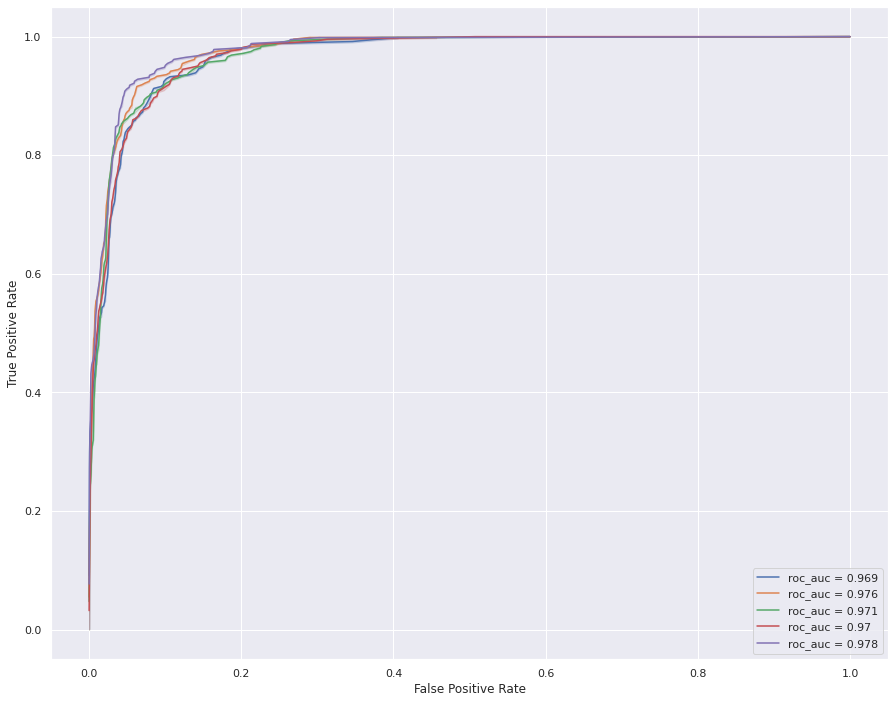

In [61]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  rfc=RandomForestClassifier(n_estimators=100,max_depth=6,criterion="entropy")

  rfc.fit(X_train_os,y_train_os)


  y_pred=rfc.predict(X_test)

  y_pred_proba_rfc_cv = rfc.predict_proba(X_test)[:, 1]

  y_pred_proba_rfc_train_cv = rfc.predict_proba(X_train_os)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train_os, y_pred_proba_rfc_train_cv),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_rfc_cv),3)
  ap_test_list_xgb.append(ap_test)

  my_aucplot(y_test, y_pred_proba_rfc_cv,"roc_auc = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"roc_train":ap_train_list_xgb,"roc_test":ap_test_list_xgb})

avg_list = [rfc_ap_df['roc_train'].mean(), rfc_ap_df['roc_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list


rfc_ap_df.head(6)

## Feature Importance

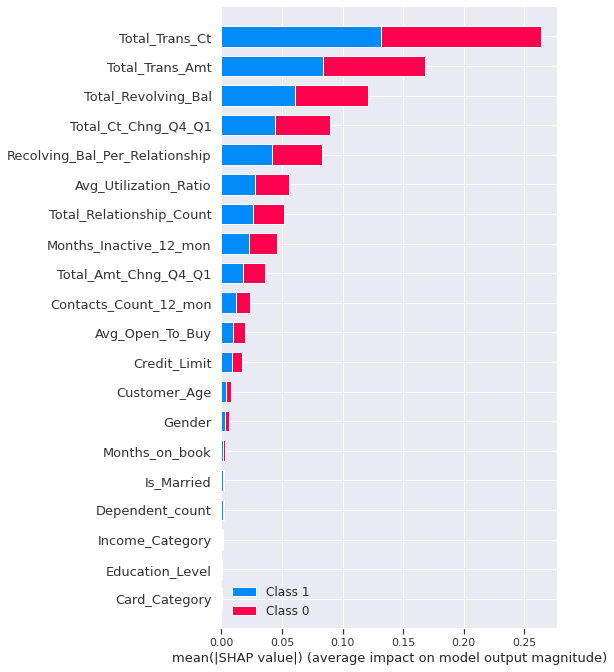

In [62]:
explainer_rfc = shap.TreeExplainer(rfc)
shap_values_rfc = explainer_rfc.shap_values(X_test)
shap.summary_plot(shap_values_rfc, X_test, plot_type="bar")

# Model 3: XG Boost

## Build Model

In [63]:
from xgboost import XGBClassifier

XGB = XGBClassifier(max_depth=3,learning_rate=0.03,n_estimators=100)

XGB.fit(X_train_os,y_train_os)

y_pred_XGB=XGB.predict(X_test)

y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

y_pred_proba_XGB_train = XGB.predict_proba(X_train)[:, 1]


## Confusion Matrix

In [64]:
XGB_matrix = metrics.confusion_matrix(y_test, y_pred_XGB)
XGB_matrix

array([[1600,  127],
       [  26,  273]])

## classication report

In [65]:
print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1727
           1       0.68      0.91      0.78       299

    accuracy                           0.92      2026
   macro avg       0.83      0.92      0.87      2026
weighted avg       0.94      0.92      0.93      2026



## Precision-Recall Curve

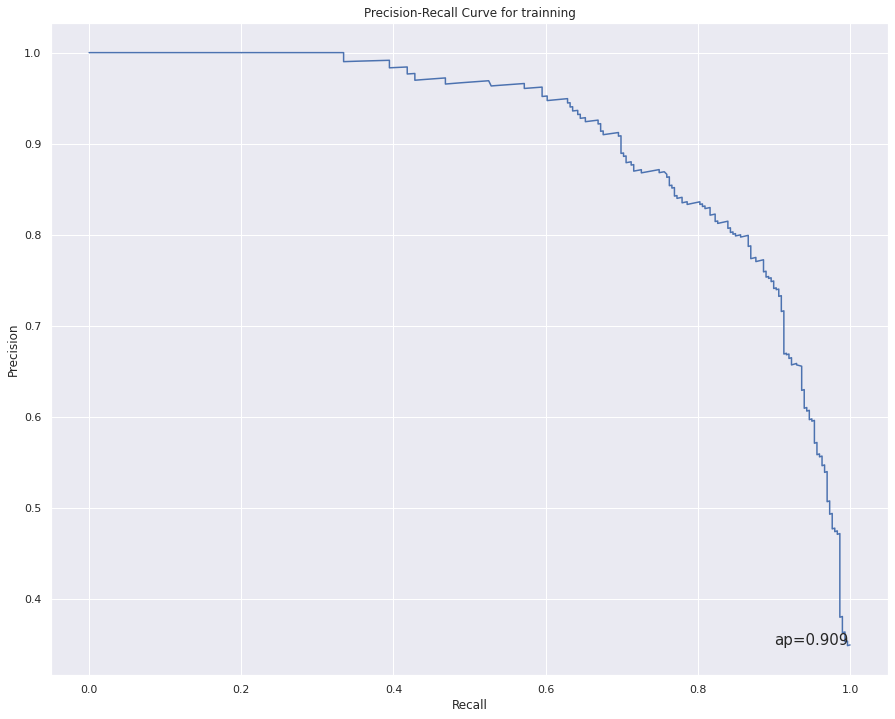

In [66]:
ap_xgb=np.round(average_precision_score(y_test, y_pred_proba_XGB),3)
#calculate precision and recall
precision_xgb, recall_xgb, thresholds = precision_recall_curve(y_test,  y_pred_proba_XGB)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_xgb, precision_xgb)

#add axis labels to plot
ax.set_title('Precision-Recall Curve for trainning')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.text(0.9, 0.35,'ap=' + str(ap_xgb) , fontsize=15) 



#display plot
plt.show()

## ROC-AUC curve

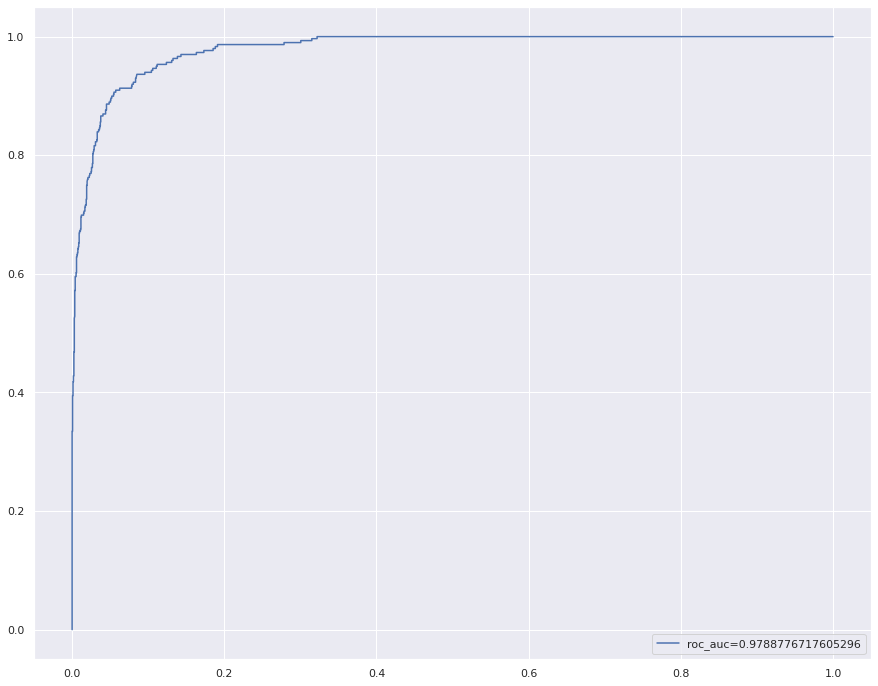

In [67]:
#define metrics
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_proba_XGB)
#create ROC curve
auc_xgb = metrics.roc_auc_score(y_test, y_pred_proba_XGB)
plt.plot(fpr_xgb,tpr_xgb,label="roc_auc="+str(auc_xgb))
plt.legend(loc=4)
plt.show()

## Hyper Parameter Tunning

## Retrain model use best parameters

In [68]:
XGB_tuned = XGBClassifier(max_depth=5,learning_rate=0.03,n_estimators=150,radom_state=4211)

XGB_tuned.fit(X_train_os,y_train_os)

XGBClassifier(learning_rate=0.03, max_depth=5, n_estimators=150,
              radom_state=4211)

In [69]:
y_pred_XGB_best=XGB_tuned.predict(X_test)
y_pred_proba_XGB_best = XGB_tuned.predict_proba(X_test)[:, 1]

In [70]:
print(classification_report(y_test, y_pred_XGB_best))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1727
           1       0.81      0.94      0.87       299

    accuracy                           0.96      2026
   macro avg       0.90      0.95      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [71]:
metrics.average_precision_score(y_test, y_pred_proba_XGB_best)

0.9544456843006455

In [72]:
metrics.roc_auc_score(y_test, y_pred_proba_XGB_best)

0.9902473599510431

## 5-Fold cross validation

,ap_train,ap_test
0,0.983,0.9540
1,0.984,0.9640
2,0.982,0.9550
3,0.983,0.9440
4,0.983,0.9560
Average,0.983,0.9546


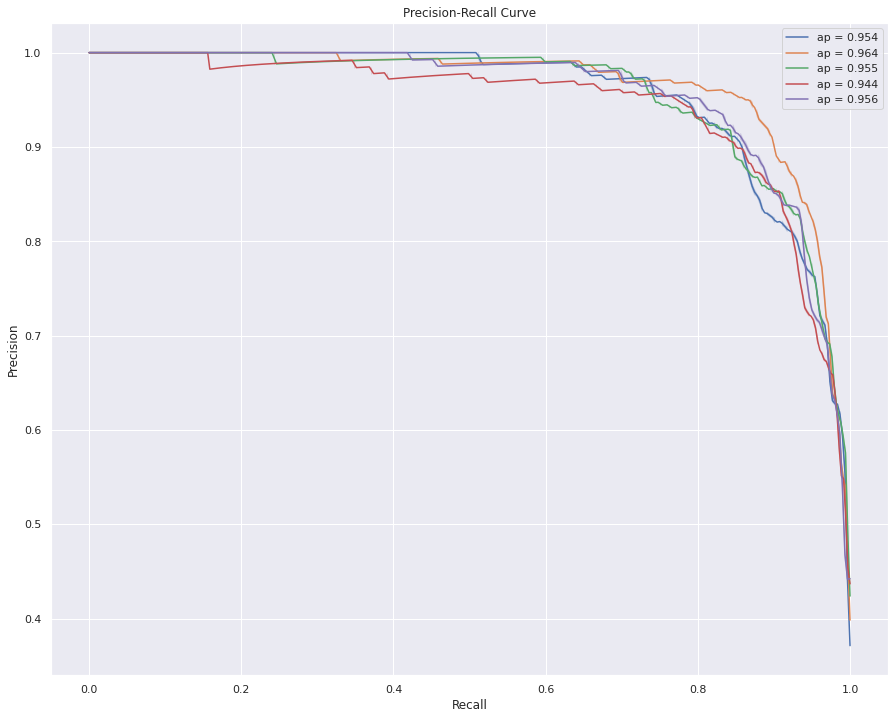

In [73]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*321)

  ros = RandomOverSampler(sampling_strategy=1, random_state=i*322) 
  
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=i*357)
  
  XGB = XGBClassifier(max_depth=5,learning_rate=0.03,n_estimators=150)

  XGB.fit(X_train_os,y_train_os)

  y_pred=XGB.predict(X_test)

  y_pred_proba_XGB = XGB.predict_proba(X_test)[:, 1]

  y_pred_proba_XGB_train = XGB.predict_proba(X_train)[:, 1]

  ap_train=np.round(metrics.average_precision_score(y_train, y_pred_proba_XGB_train),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.average_precision_score(y_test, y_pred_proba_XGB),3)
  ap_test_list_xgb.append(ap_test)

  myplot(y_test, y_pred_proba_XGB,"ap = " +str(ap_test))

rfc_ap_df=pd.DataFrame({"ap_train":ap_train_list_xgb,"ap_test":ap_test_list_xgb})

# Create a list of the average precision values
avg_list = [rfc_ap_df['ap_train'].mean(), rfc_ap_df['ap_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(6)

In [74]:
ap_train_list_xgb=[]
ap_test_list_xgb=[]
for i in range(1,6):
  X = df1.iloc[:,2:] # Features
  y = df1["Attrition_Flag"] # Target variable

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  ros = RandomOverSampler(sampling_strategy=1) 
  X_res_os, y_res_os = ros.fit_resample(X_train, y_train)

  X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_res_os, y_res_os, test_size=0.2, random_state=42)

  XGB_tuned.fit(X_train_os,y_train_os)

  y_pred=XGB_tuned.predict(X_test)

  y_pred_proba_xgb_cv = XGB_tuned.predict_proba(X_test)[:, 1]

  y_pred_proba_xgb_train_cv = XGB_tuned.predict_proba(X_train)[:, 1]

  ap_train=np.round(metrics.roc_auc_score(y_train, y_pred_proba_xgb_train_cv),3)
  ap_train_list_xgb.append(ap_train)
  
  ap_test=np.round(metrics.roc_auc_score(y_test, y_pred_proba_xgb_cv),3)
  ap_test_list_xgb.append(ap_test)

 

rfc_ap_df=pd.DataFrame({"roc_train":ap_train_list_xgb,"roc_test":ap_test_list_xgb})

avg_list = [rfc_ap_df['roc_train'].mean(), rfc_ap_df['roc_test'].mean()]

# Add the two rows to the dataframe
rfc_ap_df.loc['Average'] = avg_list

rfc_ap_df.head(6)

,roc_train,roc_test
0,0.997,0.9900
1,0.997,0.9900
2,0.997,0.9890
3,0.997,0.9890
4,0.997,0.9890
Average,0.997,0.9894


## Feature Importance

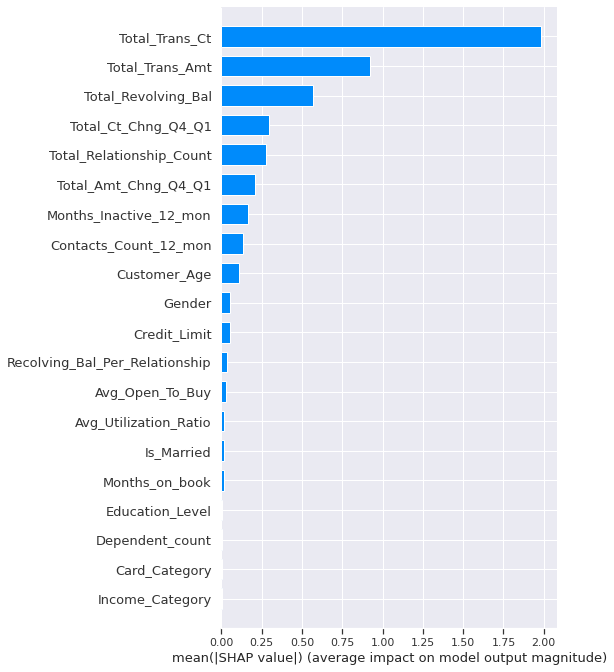

In [75]:
explainer_xgb = shap.TreeExplainer(XGB_tuned)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

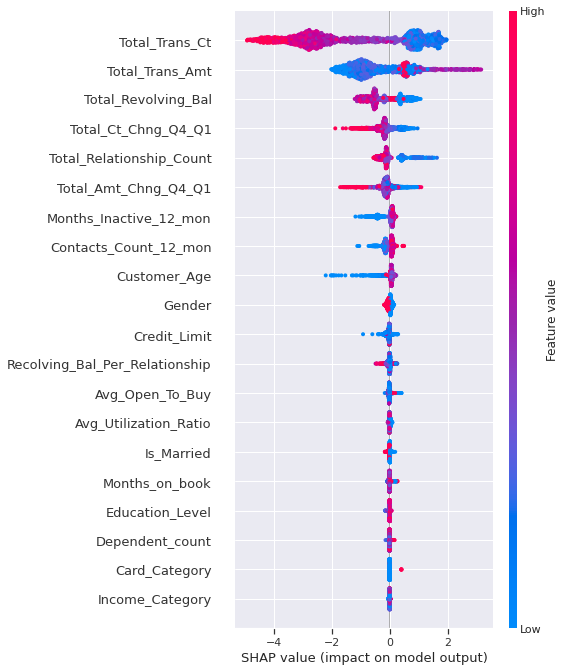

In [76]:
shap.summary_plot(shap_values_xgb, X_test)

# Conclusion

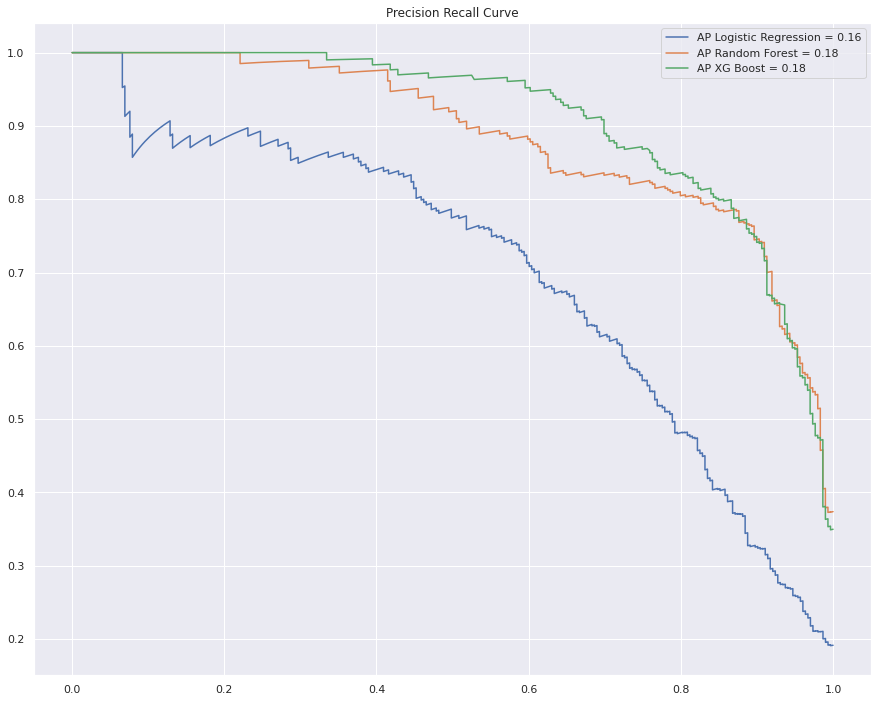

In [77]:
sting_ap="AP "

plt.title('Precision Recall Curve')

plt.plot(recall_logreg, precision_logreg, label=sting_ap+"Logistic Regression = "+str(round(metrics.average_precision_score(y_test, y_pred_proba_logreg_test), 2)))

# Plot the second precision-recall curve
plt.plot(recall_rfc, precision_rfc, label=sting_ap+"Random Forest = "+str(round(metrics.average_precision_score(y_test, y_pred_proba_rfc), 2)))

# Plot the third precision-recall curve
plt.plot(recall_xgb, precision_xgb, label=sting_ap+"XG Boost = "+str(round(metrics.average_precision_score(y_test, y_pred_proba_XGB_best), 2)))

# Add a legend to the graph
plt.legend()

# Show the plot
plt.show()

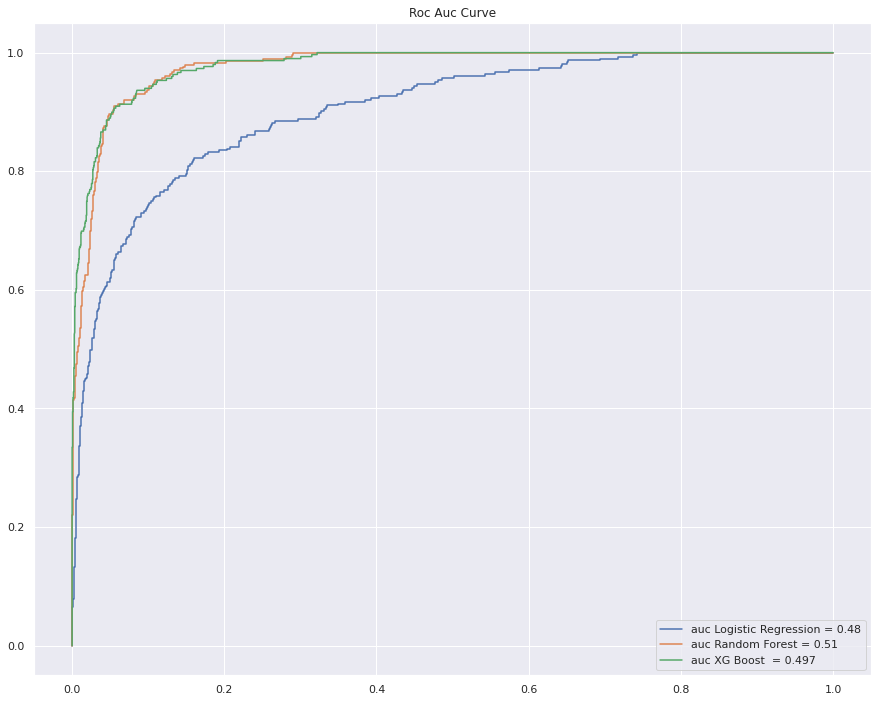

In [78]:
sting_auc="auc "

plt.title('Roc Auc Curve')
plt.plot(fpr_logreg, tpr_logreg, label=sting_auc+"Logistic Regression = "+str(round(metrics.roc_auc_score(y_test, y_pred_proba_logreg_test), 2)))

# Plot the second ROC AUC curve
plt.plot(fpr_rfc, tpr_rfc, label=sting_auc+"Random Forest = "+str(round(metrics.roc_auc_score(y_test, y_pred_proba_rfc), 2)))

# Plot the third ROC AUC curve
plt.plot(fpr_xgb, tpr_xgb, label=sting_auc+"XG Boost  = "+str(round(metrics.roc_auc_score(y_test, y_pred_proba_XGB_best), 3)))

# Add a legend to the graph
plt.legend()

# Show the plot
plt.show()

How many transaction did the customer made in the past?
What is the revolving balance?
what is the ratio of the number of transactions in Q4 over Q1?
How many accounts does this customer have with this bank?


# Pickling the model

### Random Forest

In [79]:
X_pk = df1[["Total_Trans_Ct","Total_Trans_Amt","Total_Revolving_Bal","Total_Ct_Chng_Q4_Q1","Months_Inactive_12_mon"]] # Features
y = df1["Attrition_Flag"] 

In [80]:
import pickle

Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_pk, y, test_size=0.2, random_state=321)

ros = RandomOverSampler(sampling_strategy=1) 
Xd_res_os, yd_res_os = ros.fit_resample(Xd_train, yd_train)

Xd_train_os, Xd_test_os, yd_train_os, yd_test_os = train_test_split(Xd_res_os, yd_res_os, test_size=0.2, random_state=357)
  
rfc_pk = RandomForestClassifier(max_depth=7)

rfc_pk.fit(Xd_train_os, yd_train_os)

y_pred_proba_rfc_pk = rfc_pk.predict_proba(Xd_test)[:,1]


In [81]:
metrics.roc_auc_score(yd_test, y_pred_proba_rfc_pk)

0.9763939249409561

In [82]:
average_precision_score(yd_test, y_pred_proba_rfc_pk)

0.8824755822574251

In [83]:
Xd_test.head()

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Months_Inactive_12_mon
7337,66,3391,0,0.833,3
2183,79,4107,629,0.580,1
6051,67,4002,1342,0.763,3
2332,38,1334,1960,0.407,4
5931,40,2182,0,0.429,3


In [84]:
rfc_pk.predict(Xd_test)

array([0, 0, 0, ..., 0, 0, 1])

In [85]:
my_features_rfc = pd.DataFrame({'Total_Trans_Ct':[66], 'Total_Trans_Amt':[3391], 'Total_Revolving_Bal': [0],	'Total_Ct_Chng_Q4_Q1':[0.833], 'Months_Inactive_12_mon':[3]})
rfc_pk.predict(my_features_rfc)

array([0])

In [86]:
pickle.dump(rfc_pk,open('rfc.pkl', 'wb'))

### XG Boost

In [87]:
X_pk_xgb = df1[["Total_Trans_Ct","Total_Revolving_Bal","Total_Trans_Amt","Total_Ct_Chng_Q4_Q1","Total_Relationship_Count"]] # Features
y = df1["Attrition_Flag"] 

In [88]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_pk_xgb, y, test_size=0.2, random_state=788)

ros = RandomOverSampler(sampling_strategy=1) 
Xd_res_os, yd_res_os = ros.fit_resample(Xd_train, yd_train)

Xd_train_os, Xd_test_os, yd_train_os, yd_test_os = train_test_split(Xd_res_os, yd_res_os, test_size=0.2, random_state=122)
  
xgb_pk = XGBClassifier(max_depth=3,learning_rate=0.03,objective='binary:logistic')

xgb_pk.fit(Xd_train_os, yd_train_os)

y_pred_proba_xgb_pk = xgb_pk.predict_proba(Xd_test)[:,1]

In [89]:
metrics.roc_auc_score(yd_test, y_pred_proba_xgb_pk)

0.9774476478009597

In [90]:
average_precision_score(yd_test, y_pred_proba_xgb_pk)

0.9033596833898246

In [91]:
xgb_pk.predict_proba(Xd_test)

array([[0.9612045 , 0.0387955 ],
       [0.81900877, 0.18099123],
       [0.08365089, 0.9163491 ],
       ...,
       [0.4783994 , 0.5216006 ],
       [0.96234494, 0.03765506],
       [0.8442228 , 0.15577723]], dtype=float32)

In [92]:
xgb_pk.predict(Xd_test)

array([0, 0, 1, ..., 1, 0, 0])

In [93]:
Xd_test.tail()

,Total_Trans_Ct,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count
5738,50,0,2451,0.667,5
5796,77,2517,4960,0.750,5
1351,21,1151,820,0.750,3
7400,82,1276,4613,0.745,6
4574,63,1302,3785,0.750,5


In [94]:
my_features = pd.DataFrame({'Total_Trans_Ct':[21], 'Total_Revolving_Bal':[1151], 'Total_Trans_Amt': [820],	'Total_Ct_Chng_Q4_Q1':[0.750], 'Total_Relationship_Count':[3]})
xgb_pk.predict(my_features)

array([1])

# Dollar Value Evaluation

1- Focusing on your test data only (unseen data), compute the total credit limits of the customers whom your model could correctly predict their churn in the future

2.a- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model could correctly predict their churn in the future (predicted to be 1 and actually 1)

2.b- Focusing on your test data only (unseen data), compute the average monthly balance/transactions of the customers whom your model cannot correctly predict their churn in the future (predicted to be 0 but actually 1) (edited) 






In [95]:
X_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Recolving_Bal_Per_Relationship,Is_Married,Is_Single,Is_Unknown
3781,48,0,3,0.0,0.0,0,39,4,3,4,...,1483.0,0.703,3734,64,0.882,0.504,377.000000,0,1,0
2922,59,1,1,0.0,0.0,0,53,5,5,4,...,623.0,0.706,4010,79,0.717,0.716,313.800000,0,1,0
5070,37,0,2,3.0,0.0,0,36,4,3,3,...,747.0,0.879,4727,67,0.914,0.569,246.750000,0,0,0
7246,47,1,3,5.0,1.0,0,36,4,2,3,...,3270.0,0.940,4973,74,0.850,0.317,379.000000,0,0,0
623,42,1,3,3.0,3.0,0,33,3,3,2,...,1544.0,0.524,1454,35,0.522,0.584,723.333333,0,1,0


In [96]:
combine_df=pd.DataFrame({"Y_actual":y_test,"Y_proba":y_pred_proba_XGB,"Dollar_Overall_Trx":X_test["Total_Trans_Amt"]})

In [97]:
combine_df.head()

,Y_actual,Y_proba,Dollar_Overall_Trx
3781,0,0.017080,3734
2922,0,0.029464,4010
5070,0,0.072089,4727
7246,0,0.014611,4973
623,0,0.913520,1454


In [98]:
for i in range(1,10):
  step=i/10
  col_name="Y_predict_"+str(step)
  combine_df[col_name]=1*(combine_df['Y_proba']>step)

In [99]:
combine_df.head()

,Y_actual,Y_proba,Dollar_Overall_Trx,Y_predict_0.1,Y_predict_0.2,Y_predict_0.3,Y_predict_0.4,Y_predict_0.5,Y_predict_0.6,Y_predict_0.7,Y_predict_0.8,Y_predict_0.9
3781,0,0.017080,3734,0,0,0,0,0,0,0,0,0
2922,0,0.029464,4010,0,0,0,0,0,0,0,0,0
5070,0,0.072089,4727,0,0,0,0,0,0,0,0,0
7246,0,0.014611,4973,0,0,0,0,0,0,0,0,0
623,0,0.913520,1454,1,1,1,1,1,1,1,1,1


In [100]:


Dollar_value_11=[]
Dollar_value_01=[]
Dollar_value_10=[]

for i in range(1,10): 
  pred_name="Y_predict_"+str(i/10)
  Dollar_value_11.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_01.append(combine_df.loc[(combine_df['Y_actual']==0) & (combine_df[pred_name]==1),'Dollar_Overall_Trx'].sum())
  Dollar_value_10.append(combine_df.loc[(combine_df['Y_actual']==1) & (combine_df[pred_name]==0),'Dollar_Overall_Trx'].sum())



  

In [101]:
thresh=[]
for i in range(1,10):
  thresh.append(i/10)
thresh



[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [102]:
th_df=pd.DataFrame({"threshold":thresh,"Dollar_11":Dollar_value_11,"Dollar_10":Dollar_value_10,"Dollar_01":Dollar_value_01})

In [103]:
th_df

,threshold,Dollar_11,Dollar_10,Dollar_01
0,0.1,348644,764179,2350257
1,0.2,247072,865751,1789212
2,0.3,217359,895464,1496808
3,0.4,184508,928315,1327488
4,0.5,175981,936842,1164586
5,0.6,160439,952384,1074817
6,0.7,144117,968706,998483
7,0.8,129280,983543,948098
8,0.9,125152,987671,770362


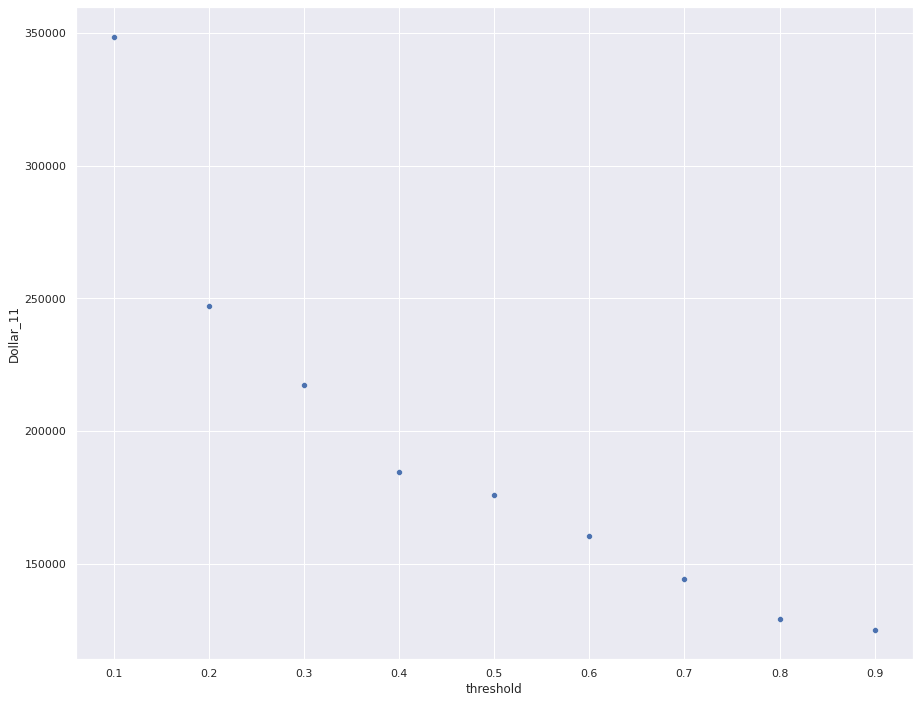

In [104]:
sns.scatterplot(th_df['threshold'],th_df['Dollar_11'])